In [21]:
from glob import glob
import zipfile
import pandas as pd

# Wypakowanie pliku ZIP
with zipfile.ZipFile('Dane.zip', 'r') as zip_ref:
    zip_ref.extractall('.')

nazwy_plikow = glob("*.csv")

liczba_przypadkow = []

#wczytanie danych z plikow
for i in range(0, len(nazwy_plikow)):
    adres = nazwy_plikow[i]
    try:
        tabela = pd.read_csv(adres, sep=';') #dla i => 25 blad UnicodeDecodeError
    except UnicodeDecodeError:
        tabela = pd.read_csv(adres, sep=';', encoding='iso-8859-2')
    a = tabela.iloc[0,1]
    liczba_przypadkow.append(a)
#0-wt, 1-śr, 2-czw, 3-pt, 4-sob, 5-ndz, 6-pn

#segregacja wynikow ze wzgledu na dni tygodnia
wtorek = []
i=0
while i<len(liczba_przypadkow):
    wtorek.append(liczba_przypadkow[i])
    i=i+7

sroda = []
i=1
while i<len(liczba_przypadkow):
    sroda.append(liczba_przypadkow[i])
    i=i+7
    
#tablica z czwartkow
czwartek = []
i = 2
while i<len(liczba_przypadkow):
    czwartek.append(liczba_przypadkow[i])
    i=i+7

#tablica z piatek
piatek =[]
i = 3
while i<len(liczba_przypadkow):
    piatek.append(liczba_przypadkow[i])
    i=i+7

#tablica z soboty
sobota =[]
i = 4
while i<len(liczba_przypadkow):
    sobota.append(liczba_przypadkow[i])
    i=i+7
#tablica z niedzieli

niedziela =[]
i = 5
while i<len(liczba_przypadkow):
    niedziela.append(liczba_przypadkow[i])
    i=i+7
    
poniedzialek = []
i = 6
while i<len(liczba_przypadkow):
    poniedzialek.append(liczba_przypadkow[i])
    i=i+7

#print(len(czwartek))
    

In [22]:
#czwartek
srednia_czw=0

#liczenie sredniej z poprzedniego roku
for i in range(len(czwartek)-(53+4),len(czwartek)-(53-4)):
    srednia_czw=srednia_czw+czwartek[i]
    
srednia_czw = srednia_czw/8

#wspolczynnik a jako roznica liczby zakazen w zeszlym roku
a_czw = (czwartek[len(czwartek)-53]-czwartek[len(czwartek)-54])/7

#obliczenie prognozowanej liczby zakazen
czwartek_prognoza=czwartek[len(czwartek)-1]+7*a_czw*czwartek[len(czwartek)-1]/srednia_czw
#print(czwartek_prognoza)

In [23]:
#piatek(14.04.2023)
srednia_pt=0

#liczenie sredniej z poprzedniego roku
for i in range(len(piatek)-(52+4),len(piatek)-(52-4)):
    srednia_pt=srednia_pt+piatek[i]
    #j=j+1
srednia_pt = srednia_pt/8

#wspolczynnik a jako roznica liczby zakazen w zeszlym roku
a_pt = (piatek[len(piatek)-52]-piatek[len(piatek)-53])/7

#tabela, w ktorej beda zapisane prognozowane wyniki dla piatku
piatek_prognoza=[0, 0]

#obliczenie prognozowanej liczby zakazen
piatek_prognoza[0]=piatek[len(piatek)-1]+7*a_pt*piatek[len(piatek)-1]/srednia_pt

#print(piatek_prognoza[0])

#i znowu to samo co wyzej, tylko srednia jest liczona z innych tygodni (przesuniecie o 1 tydzien do przodu)
#piatek 21.04.2023
srednia_pt=0
for i in range(len(piatek)-(52+3),len(piatek)-(52-5)):
    srednia_pt=srednia_pt+piatek[i]
    #j=j+1
srednia_pt = (srednia_pt)/8
a_pt = (piatek[len(piatek)-51]-piatek[len(piatek)-52])/7

piatek_prognoza[1]=piatek_prognoza[0]+7*a_pt*piatek_prognoza[0]/srednia_pt
#print(piatek_prognoza[1])

In [24]:
#teraz dla pozostalych dni tygodnia robimy to samo co dla piatku

#sobota(15.04.2023)
srednia_sob=0

for i in range(len(sobota)-(52+4),len(sobota)-(52-4)):
    srednia_sob=srednia_sob+sobota[i]
    #j=j+1
srednia_sob = srednia_sob/8

a_sob = (sobota[len(sobota)-52]-sobota[len(sobota)-53])/7
sobota_prognoza=[0, 0]

sobota_prognoza[0]=sobota[len(sobota)-1]+7*a_sob*sobota[len(sobota)-1]/srednia_sob


#print(sobota_prognoza[0])


#sobota 22.04.2023
srednia_sob=0
for i in range(len(sobota)-(52+3),len(sobota)-(52-5)):
    srednia_sob=srednia_sob+sobota[i]
srednia_sob = (srednia_sob)/8

a_sob = (sobota[len(sobota)-51]-sobota[len(sobota)-52])/7

sobota_prognoza[1]=sobota_prognoza[0]+7*a_sob*sobota_prognoza[0]/srednia_sob
#print(sobota_prognoza[1])

In [25]:
#niedziela(16.04.2023)
srednia_ndz=0

for i in range(len(niedziela)-(52+4),len(niedziela)-(52-4)):
    srednia_ndz=srednia_ndz+niedziela[i]
    #j=j+1
srednia_ndz = srednia_ndz/8

a_ndz = (niedziela[len(niedziela)-52]-niedziela[len(niedziela)-53])/7
niedziela_prognoza=[0, 0]

niedziela_prognoza[0]=niedziela[len(niedziela)-1]+7*a_ndz*niedziela[len(niedziela)-1]/srednia_ndz


#print(niedziela_prognoza[0])


#niedziela 23.04.2023
srednia_ndz=0
for i in range(len(niedziela)-(52+3),len(niedziela)-(52-5)):
    srednia_ndz=srednia_ndz+niedziela[i]
srednia_ndz = (srednia_ndz)/8

a_ndz = (niedziela[len(niedziela)-51]-niedziela[len(niedziela)-52])/7

niedziela_prognoza[1]=niedziela_prognoza[0]+7*a_ndz*niedziela_prognoza[0]/srednia_ndz
#print(niedziela_prognoza[1])

In [26]:
#poniedzialek(17.04.2023)
srednia_pn=0

for i in range(len(poniedzialek)-(52+4),len(poniedzialek)-(52-4)):
    srednia_pn=srednia_pn+poniedzialek[i]
    #j=j+1
srednia_pn = srednia_pn/8

a_pn = (poniedzialek[len(poniedzialek)-52]-poniedzialek[len(poniedzialek)-53])/7
poniedzialek_prognoza=[0, 0]

poniedzialek_prognoza[0]=poniedzialek[len(poniedzialek)-1]+7*a_pn*poniedzialek[len(poniedzialek)-1]/srednia_pn


#print(poniedzialek_prognoza[0])


#poniedzialek 24.04.2023
srednia_pn=0
for i in range(len(poniedzialek)-(52+3),len(poniedzialek)-(52-5)):
    srednia_pn=srednia_pn+poniedzialek[i]
srednia_pn = (srednia_pn)/8

a_pn = (poniedzialek[len(poniedzialek)-51]-poniedzialek[len(poniedzialek)-52])/7

poniedzialek_prognoza[1]=poniedzialek_prognoza[0]+7*a_pn*poniedzialek_prognoza[0]/srednia_pn
#print(poniedzialek_prognoza[1])

In [27]:
#wtorek(18.04.2023)
srednia_wt=0

for i in range(len(wtorek)-(52+4),len(wtorek)-(52-4)):
    srednia_wt=srednia_wt+wtorek[i]
srednia_wt = srednia_wt/8

a_wt = (wtorek[len(wtorek)-52]-wtorek[len(wtorek)-53])/7
wtorek_prognoza=[0, 0]

wtorek_prognoza[0]=wtorek[len(wtorek)-1]+7*a_wt*wtorek[len(wtorek)-1]/srednia_wt


#print(wtorek_prognoza[0])


#wtorek 25.04.2023
srednia_wt=0
for i in range(len(wtorek)-(52+3),len(wtorek)-(52-5)):
    srednia_wt=srednia_wt+wtorek[i]
srednia_wt = (srednia_wt)/8

a_wt = (wtorek[len(wtorek)-51]-wtorek[len(wtorek)-52])/7

wtorek_prognoza[1]=wtorek_prognoza[0]+7*a_wt*wtorek_prognoza[0]/srednia_wt
#print(wtorek_prognoza[1])

In [28]:
#sroda(19.04.2023)
srednia_sr=0

for i in range(len(sroda)-(52+4),len(sroda)-(52-4)):
    srednia_sr=srednia_sr+sroda[i]
    #j=j+1
srednia_sr = srednia_sr/8
a_sr = (sroda[len(sroda)-52]-sroda[len(sroda)-53])/7
sroda_prognoza=[0, 0]

sroda_prognoza[0]=sroda[len(sroda)-1]+7*a_sr*sroda[len(sroda)-1]/srednia_sr


#print(sroda_prognoza[0])


#sroda 26.04.2023
srednia_sr=0
for i in range(len(sroda)-(52+3),len(sroda)-(52-5)):
    srednia_sr=srednia_sr+sroda[i]
srednia_sr = (srednia_sr)/8
a_sr = (sroda[len(sroda)-51]-sroda[len(sroda)-52])/7

sroda_prognoza[1]=sroda_prognoza[0]+7*a_sr*sroda_prognoza[0]/srednia_sr
#print(sroda_prognoza[1])

In [30]:
#wynik końcowy
import math

#tworzymy macierz, w ktorej beda zapisane wszystkie prognozowane wyniki w kolejnosci chronologicznej
liczba_przypadkow_przewidywana = []
for i in range(0,2):
    liczba_przypadkow_przewidywana.append(math.floor(piatek_prognoza[i]))
    liczba_przypadkow_przewidywana.append(math.floor(sobota_prognoza[i]))
    liczba_przypadkow_przewidywana.append(math.floor(niedziela_prognoza[i]))
    liczba_przypadkow_przewidywana.append(math.floor(poniedzialek_prognoza[i]))
    liczba_przypadkow_przewidywana.append(math.floor(wtorek_prognoza[i]))
    liczba_przypadkow_przewidywana.append(math.floor(sroda_prognoza[i]))
    if i==0:
        liczba_przypadkow_przewidywana.append(math.floor(czwartek_prognoza)) #prognozowalismy tylko jeden czwartek

#wypisujemy wyniki
for i in range(0, len(liczba_przypadkow_przewidywana)):
    print('Prognoza na ' + str(i + 14) + '.04.2023: '+ str(liczba_przypadkow_przewidywana[i]))

Prognoza na 14.04.2023: 672
Prognoza na 15.04.2023: 795
Prognoza na 16.04.2023: 96
Prognoza na 17.04.2023: 87
Prognoza na 18.04.2023: 1231
Prognoza na 19.04.2023: 1146
Prognoza na 20.04.2023: 779
Prognoza na 21.04.2023: 543
Prognoza na 22.04.2023: 483
Prognoza na 23.04.2023: 59
Prognoza na 24.04.2023: 58
Prognoza na 25.04.2023: 623
Prognoza na 26.04.2023: 779


In [32]:
daty = []
for i in range(len(liczba_przypadkow_przewidywana)):
    daty.append(str(i + 14) + '.04.2023')
print(daty)

['14.04.2023', '15.04.2023', '16.04.2023', '17.04.2023', '18.04.2023', '19.04.2023', '20.04.2023', '21.04.2023', '22.04.2023', '23.04.2023', '24.04.2023', '25.04.2023', '26.04.2023']


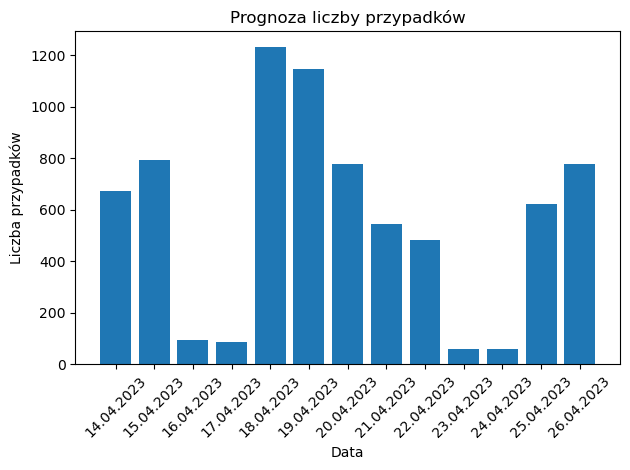

In [37]:
import matplotlib.pyplot as plt

plt.bar(daty, liczba_przypadkow_przewidywana)
plt.xlabel('Data')
plt.ylabel('Liczba przypadków')
plt.title('Prognoza liczby przypadków')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()